In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-digit-recognizer/train.csv


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
df=pd.read_csv("/kaggle/input/mnist-digit-recognizer/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df.shape

(42000, 785)

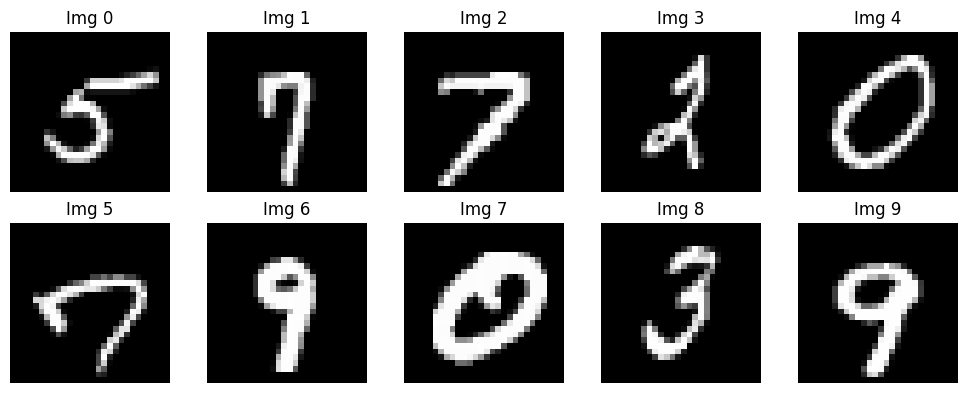

In [156]:
data=df.sample(10).reset_index(drop=True)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Img {i}")

plt.tight_layout()
plt.show()

**Before PCA apply KNN**

In [157]:

X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape

(33600, 784)

In [159]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [160]:
import time
st=time.time()
y_pred=knn.predict(X_test)
print(f"time take to predict - {time.time()-st}s")
print(accuracy_score(y_test,y_pred))

time take to predict - 14.873965740203857s
0.9651190476190477


**Apply PCA**

In [161]:
# mean centreing  
std = StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [162]:
## pca
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [163]:
knn=KNeighborsClassifier()
knn.fit(X_train_trf,y_train.values.ravel())

st=time.time()
y_pred=knn.predict(X_test_trf)
print(f"time take to predict - {time.time()-st}s")
print(accuracy_score(y_test,y_pred)) 

time take to predict - 1.7115614414215088s
0.9520238095238095


In [164]:
# all_acc=[]

# for i in range(1,785):
#     pca=PCA(n_components=i)
#     X_train_trf=pca.fit_transform(X_train)
#     X_test_trf=pca.transform(X_test)
#     knn=KNeighborsClassifier()
#     knn.fit(X_train_trf,y_train.values.ravel())
    
#     y_pred=knn.predict(X_test_trf)
#     acc=accuracy_score(y_test,y_pred)
#     all_acc.append([i,acc])
#     print(f"n_components={i}, accuracy -> {acc}") 

In [165]:
# plt.plot(all_acc)

In [166]:
pca=PCA(n_components=2)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [167]:
## 2D plot of features 
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_new[:,0],
                 y=X_train_new[:,1],
                 color=y_train.values.ravel(),
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show() 


In [168]:
## 3D plot 
pca=PCA(n_components=3)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [169]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train.values.ravel())
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [170]:
pca.explained_variance_   ## eigen values 

array([40.71663636, 29.1408831 , 26.81721396])

In [171]:
pca.components_  ## eigen vectors in 784Dimension 

array([[ 1.69903163e-18, -1.33186832e-18,  1.36320657e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 6.32598732e-18, -1.08856512e-17,  7.60189787e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.34126531e-16,  5.20838896e-17, -1.08213438e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [174]:
pca.components_.shape

(3, 784)

In [175]:
pca.explained_variance_ratio_  ## how much variance of data explained by single eigan value 

array([0.05799918, 0.04150999, 0.03820002])

In [176]:
pca=PCA(n_components=None)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
pca.explained_variance_   ## eigen values 

array([4.07166364e+01, 2.91408831e+01, 2.68172143e+01, 2.08224513e+01,
       1.81208454e+01, 1.57742130e+01, 1.38422273e+01, 1.25435004e+01,
       1.10254309e+01, 1.00759617e+01, 9.60197797e+00, 8.66515284e+00,
       8.05782260e+00, 7.85788185e+00, 7.47579752e+00, 7.14252454e+00,
       6.70644590e+00, 6.59946174e+00, 6.44614722e+00, 6.30731378e+00,
       5.97224038e+00, 5.77027724e+00, 5.50604987e+00, 5.33708913e+00,
       5.16220548e+00, 4.98063534e+00, 4.91758312e+00, 4.74014632e+00,
       4.49099071e+00, 4.40399447e+00, 4.34807558e+00, 4.24815845e+00,
       4.13964081e+00, 4.07585743e+00, 4.01662811e+00, 3.90107830e+00,
       3.83544307e+00, 3.72396644e+00, 3.59844044e+00, 3.51597031e+00,
       3.45290684e+00, 3.40553132e+00, 3.31535090e+00, 3.26057276e+00,
       3.20820433e+00, 3.15886696e+00, 3.14349304e+00, 3.11345590e+00,
       3.10059388e+00, 3.01839043e+00, 2.97124340e+00, 2.93148437e+00,
       2.88576239e+00, 2.82563018e+00, 2.80329003e+00, 2.79629026e+00,
      

In [181]:
## check how much eigan values need to explain 90% of variance of data
np.cumsum(pca.explained_variance_ratio_)  

array([0.05799918, 0.09950917, 0.1377092 , 0.16736993, 0.19318233,
       0.21565205, 0.23536973, 0.25323744, 0.26894271, 0.28329551,
       0.29697313, 0.30931628, 0.32079432, 0.33198755, 0.34263652,
       0.35281075, 0.36236381, 0.37176447, 0.38094675, 0.38993126,
       0.39843847, 0.40665799, 0.41450114, 0.4221036 , 0.42945695,
       0.43655166, 0.44355656, 0.4503087 , 0.45670593, 0.46297924,
       0.4691729 , 0.47522423, 0.48112097, 0.48692687, 0.49264839,
       0.49820532, 0.50366875, 0.50897338, 0.51409922, 0.51910757,
       0.5240261 , 0.52887714, 0.53359972, 0.53824427, 0.54281422,
       0.5473139 , 0.55179168, 0.55622667, 0.56064334, 0.56494291,
       0.56917533, 0.5733511 , 0.57746176, 0.58148675, 0.58547992,
       0.58946312, 0.59336758, 0.59714261, 0.60087936, 0.60457987,
       0.60820612, 0.61177812, 0.61530108, 0.61878842, 0.62222742,
       0.62561036, 0.62897869, 0.63231763, 0.63555434, 0.63876658,
       0.64193464, 0.64506916, 0.64816639, 0.65124861, 0.65431

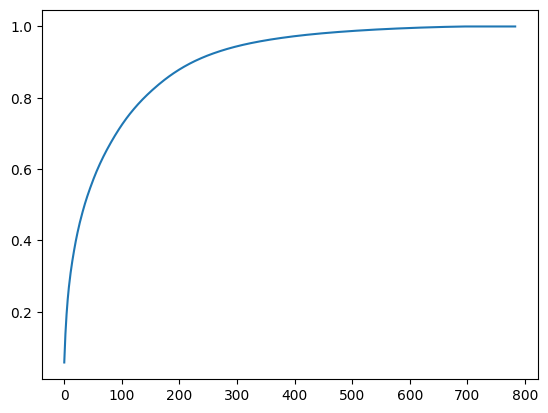

In [184]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))